<a href="https://colab.research.google.com/github/priyanshuanandd/Movie-Rating-Predictor/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Credit Card Fraud Detection Project Summary**

  This project focuses on detecting fraudulent credit card transactions using machine learning, addressing the challenge of highly imbalanced data. We explore two resampling techniques—undersampling and SMOTE oversampling—to balance the dataset and compare their impact on three classification models: Logistic Regression, XGBoost, and Random Forest. Evaluation metrics include Precision, Recall, Accuracy, and F1 Score.

## **Dataset Overview:**

**Transactions:** 284,807 (2 days, September 2013, European cardholders)
**Fraudulent transactions**: 492 (0.172%)
**Features: **28 PCA-transformed, 'Time', and 'Amount'
**Target:** 'Class' (1 for fraud, 0 for legitimate)
**Data Preprocessing:**

**Handle missing values**
**Normalize 'Amount' using StandardScaler**
**Addressing Class Imbalance:**

**Undersampling:** Balances the dataset by reducing legitimate transactions.
**SMOTE Oversampling:** Generates synthetic fraudulent samples.
## **Methodology:**


**Data Preprocessing**Model Training and Evaluation on both resampled datasets
Comparison and Visualization of results
Results:

**Comparison of models and resampling techniques** helps determine the best approach for fraud detection.
Libraries Required:

numpy, pandas, scikit-learn, imblearn, xgboost, matplotlib

In [ ]:
 !pip install kaggle
 !mkdir  ~/.kaggle
 !cp kaggle.json ~/.kaggle/
 !chmod 600 ~/.kaggle/kaggle.json
 !kaggle datasets download -d mlg-ulb/creditcardfraud
 !unzip creditcardfraud.zip



cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 74% 49.0M/66.0M [00:00<00:00, 75.7MB/s]
100% 66.0M/66.0M [00:00<00:00, 83.9MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
#Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

#Metrics
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
credit_card_df = pd.read_csv('creditcard.csv')

In [ ]:
credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit_card_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
#information of the dataset
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Data Preprocessing and Normalisation
# Handling Missing values

credit_card_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#We have no missing values
#Will now Normalise the amount column in the dataset

scaler = StandardScaler()
credit_card_df['Norm_Amount'] = scaler.fit_transform(credit_card_df['Amount'].values.reshape(-1,1))
credit_card_df = credit_card_df.drop(['Time','Amount'], axis = 1)
credit_card_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Norm_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [ ]:
#Checking for Imbalance
credit_card_df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

We can verify that the dataset is imbalanced and lacks enough data for a fraudulent transaction


1. Undersampling

In [ ]:
#1.Using Undersampling

#Splitting the dataframe on the basis of class

legit = credit_card_df[credit_card_df.Class == 0]
fraud = credit_card_df[credit_card_df.Class == 1]



In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 30)
(492, 30)


In [ ]:
#Number of Fraud transactions are 492
legit_bit = legit.sample(n=492)


#Concatenating

credit_card_df_undersample = pd.concat([legit_bit, fraud], axis=0)

In [ ]:
credit_card_df_undersample['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [ ]:
#Splitting into features and targets

x_us = credit_card_df_undersample.drop(columns='Class', axis=1)
y_us = credit_card_df_undersample['Class']

In [ ]:
X_train_us, X_test_us, y_train_us, y_test_us  = train_test_split(x_us, y_us, test_size=0.2,stratify=y_us, random_state=2)

In [ ]:
print(x_us.shape, X_train_us.shape, X_test_us.shape)

(984, 29) (787, 29) (197, 29)


In [ ]:

# Logistic Regression with undersampling
log_reg_us = LogisticRegression()
log_reg_us.fit(X_train_us, y_train_us)

print("Logistic Regression with undersampling:")
print("Accuracy:",accuracy_score(y_test_us, log_reg_us.predict(X_test_us)))
print("Precision:", precision_score(y_test_us, log_reg_us.predict(X_test_us)))
print("Recall:", recall_score(y_test_us, log_reg_us.predict(X_test_us)))
print("F1 Score:", f1_score(y_test_us, log_reg_us.predict(X_test_us)))
print("Confusion Matrix:", confusion_matrix(y_test_us, log_reg_us.predict(X_test_us)))
print("Classification Report:", classification_report(y_test_us, log_reg_us.predict(X_test_us)))



Logistic Regression with undersampling:
Accuracy: 0.9187817258883249
Precision: 0.9361702127659575
Recall: 0.8979591836734694
F1 Score: 0.9166666666666666
Confusion Matrix: [[93  6]
 [10 88]]
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.94      0.92        99
           1       0.94      0.90      0.92        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



In [ ]:
#XG-Boost for Undersampling
xgb_model = XGBClassifier(n_estimators=200, max_depth=20, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8)
xgb_model.fit(X_train_us, y_train_us)

print("XGBoost with undersampling:")
print("Accuracy:", accuracy_score(y_test_us, xgb_model.predict(X_test_us)))
print("Precision:", precision_score(y_test_us, xgb_model.predict(X_test_us)))
print("Recall:", recall_score(y_test_us, xgb_model.predict(X_test_us)))
print("F1 Score:", f1_score(y_test_us, xgb_model.predict(X_test_us)))
print("Confusion Matrix:", confusion_matrix(y_test_us, xgb_model.predict(X_test_us)))
print("Classification Report:", classification_report(y_test_us, xgb_model.predict(X_test_us)))


XGBoost with undersampling:
Accuracy: 0.9289340101522843
Precision: 0.9468085106382979
Recall: 0.9081632653061225
F1 Score: 0.9270833333333334
Confusion Matrix: [[94  5]
 [ 9 89]]
Classification Report:               precision    recall  f1-score   support

           0       0.91      0.95      0.93        99
           1       0.95      0.91      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



In [ ]:

# Random Forest for undersampling
rf_model_us = RandomForestClassifier(random_state = 42)
rf_model_us.fit(X_train_us, y_train_us)

print("Random Forest with undersampling:")
print("Accuracy:", accuracy_score(y_test_us, rf_model_us.predict(X_test_us)))
print("Precision:", precision_score(y_test_us, rf_model_us.predict(X_test_us)))
print("Recall:", recall_score(y_test_us, rf_model_us.predict(X_test_us)))
print("F1 Score:", f1_score(y_test_us, rf_model_us.predict(X_test_us)))
print("Confusion Matrix:", confusion_matrix(y_test_us, rf_model_us.predict(X_test_us)))
print("Classification Report:", classification_report(y_test_us, rf_model_us.predict(X_test_us)))


Random Forest with undersampling:
Accuracy: 0.9086294416243654
Precision: 0.9444444444444444
Recall: 0.8673469387755102
F1 Score: 0.9042553191489361
Confusion Matrix: [[94  5]
 [13 85]]
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.95      0.91        99
           1       0.94      0.87      0.90        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



2. Oversampling(SMOTE)

In [ ]:
#2.Using Oversampling Technique - SMOTE
# Splitting data into training and testing sets
X_os = credit_card_df.drop('Class', axis=1)
y_os = credit_card_df['Class']


X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_os, y_os, test_size=0.2,stratify=y_os, random_state=2)

In [ ]:
#Applying SMOTE with Minority Strategy
smote = SMOTE(sampling_strategy='minority')
X_train_sm, y_train_sm = smote.fit_resample(X_train_os, y_train_os)

In [ ]:
X_train_sm.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Norm_Amount
0,0.201840,0.814359,-1.039124,-0.351936,1.165946,-0.377859,1.326223,-0.262268,-0.253688,-1.123986,...,0.196694,0.312094,0.890752,-0.064932,-0.026465,-0.202777,-0.152459,0.115266,0.139604,0.024030
1,1.219060,-0.207708,0.782809,0.271655,-0.456658,0.414201,-0.675133,0.057714,0.601970,-0.178378,...,0.166221,0.170372,0.541010,-0.257175,-0.904534,0.414090,0.653565,0.014583,0.027320,-0.162721
2,1.820307,-1.168447,-1.636245,-0.452077,0.123191,0.842629,-0.465635,0.182277,-0.215586,0.605667,...,-0.523770,0.088054,0.714346,0.049894,-0.350602,-0.048669,0.038473,0.034850,-0.039948,0.136536
3,-1.139164,1.132194,1.514213,-1.178960,-0.543484,-0.944796,0.231654,0.411327,-0.248846,-0.904551,...,-0.108074,0.045632,0.065280,0.081683,0.655150,-0.452448,0.703637,0.019069,0.111934,-0.346073
4,2.118619,-0.347077,-3.557670,-1.423362,2.828792,2.641517,0.092265,0.483641,-0.096698,0.152377,...,-0.086643,0.107128,0.265413,0.047491,0.816079,0.198762,1.437119,-0.161027,-0.099222,-0.275627


In [ ]:

# Training Logistic Regression classifier
lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(X_train_sm, y_train_sm)

#predictions
y_pred_lr = lr_clf.predict(X_test_os)

# Evaluation
precision_lr = precision_score(y_test_os, y_pred_lr)
recall_lr = recall_score(y_test_os, y_pred_lr)
f1_lr = f1_score(y_test_os, y_pred_lr)

print("Logistic Regression - Precision: ", precision_lr)
print("Logistic Regression - Recall: ", recall_lr)
print("Logistic Regression - F1 Score: ", f1_lr)
print("Confusion Matrix:",confusion_matrix(y_test_os, y_pred_lr))
print("Classification Report:",classification_report(y_test_os, y_pred_lr))


Logistic Regression - Precision:  0.05765654060756355
Logistic Regression - Recall:  0.9489795918367347
Logistic Regression - F1 Score:  0.10870835768556401
Confusion Matrix: [[55344  1520]
 [    5    93]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.95      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1.00      0.97      0.98     56962



In [ ]:
import xgboost as xgb

# Training the XGBoost classifier
xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(X_train_sm, y_train_sm)

#predictions
y_pred_xgb = xgb_clf.predict(X_test_os)

# Evaluation
precision_xgb = precision_score(y_test_os, y_pred_xgb)
recall_xgb = recall_score(y_test_os, y_pred_xgb)
f1_xgb = f1_score(y_test_os, y_pred_xgb)

print("XGBoost - Precision: ", precision_xgb)
print("XGBoost - Recall: ", recall_xgb)
print("XGBoost - F1 Score: ", f1_xgb)
print("Confusion Matrix:",confusion_matrix(y_test_os, y_pred_xgb))
print("Classification Report:",classification_report(y_test_os, y_pred_xgb))


XGBoost - Precision:  0.7391304347826086
XGBoost - Recall:  0.8673469387755102
XGBoost - F1 Score:  0.7981220657276995
Confusion Matrix: [[56834    30]
 [   13    85]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.87      0.80        98

    accuracy                           1.00     56962
   macro avg       0.87      0.93      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:

# Training the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_sm, y_train_sm)

#predictions
y_pred_rf = rf_clf.predict(X_test_os)

# Evaluation
precision_rf = precision_score(y_test_os, y_pred_rf)
recall_rf = recall_score(y_test_os, y_pred_rf)
f1_rf = f1_score(y_test_os, y_pred_rf)

print("Random Forest - Precision: ", precision_rf)
print("Random Forest - Recall: ", recall_rf)
print("Random Forest - F1 Score: ", f1_rf)
print("Confusion Matrix:",confusion_matrix(y_test_os, y_pred_rf))
print("Classification Report:",classification_report(y_test_os, y_pred_rf))


Random Forest - Precision:  0.8316831683168316
Random Forest - Recall:  0.8571428571428571
Random Forest - F1 Score:  0.8442211055276382
Confusion Matrix: [[56847    17]
 [   14    84]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.86      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.93      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
us_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'XGBoost', 'Random Forest'],
    'Precision': [precision_score(y_test_us, log_reg_us.predict(X_test_us)),
                 precision_score(y_test_us, xgb_model.predict(X_test_us)),
                 precision_score(y_test_us, rf_model_us.predict(X_test_us))],
    'Recall': [recall_score(y_test_us, log_reg_us.predict(X_test_us)),
                recall_score(y_test_us, xgb_model.predict(X_test_us)),
                recall_score(y_test_us, rf_model_us.predict(X_test_us))],
    'F1 Score': [f1_score(y_test_us, log_reg_us.predict(X_test_us)),
                 f1_score(y_test_us, xgb_model.predict(X_test_us)),
                 f1_score(y_test_us, rf_model_us.predict(X_test_us))]
})

os_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'XGBoost', 'Random Forest'],
    'Precision': [precision_lr, precision_xgb, precision_rf],
    'Recall': [recall_lr, recall_xgb, recall_rf],
    'F1 Score': [f1_lr, f1_xgb, f1_rf]
})

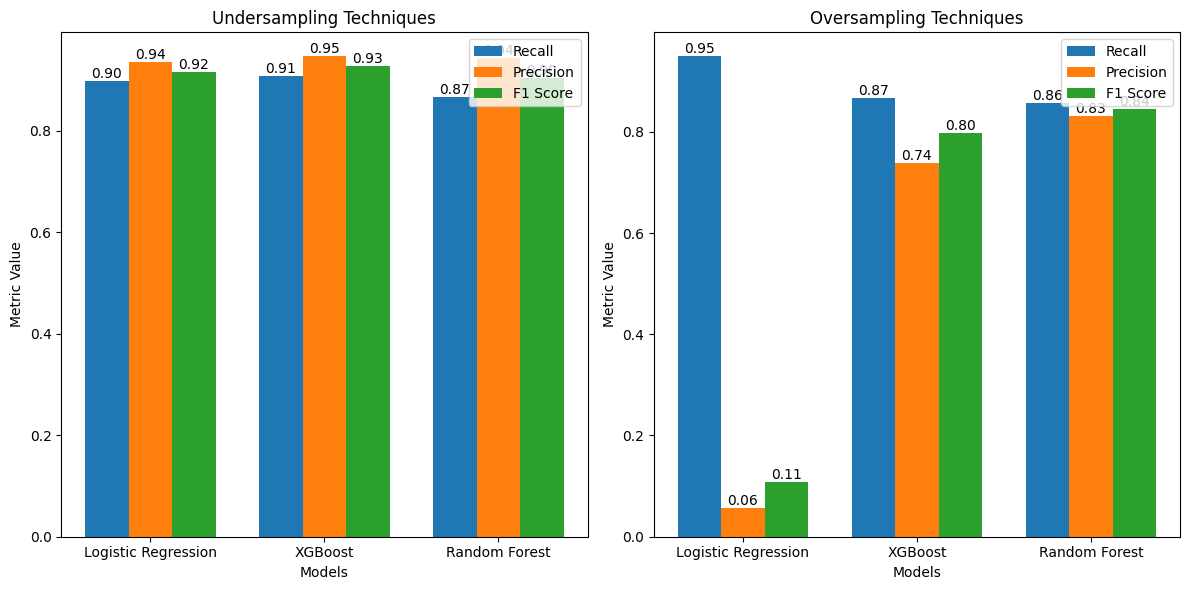

In [ ]:

# Define bar width and positions
bar_width = 0.25
index = np.arange(len(us_results['Model']))

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Undersampling bar graph
bars_us_recall = ax1.bar(index - bar_width, us_results['Recall'], width=bar_width, label='Recall')
bars_us_precision = ax1.bar(index, us_results['Precision'], width=bar_width, label='Precision')
bars_us_f1 = ax1.bar(index + bar_width, us_results['F1 Score'], width=bar_width, label='F1 Score')
ax1.set_title('Undersampling Techniques')
ax1.set_xlabel('Models')
ax1.set_ylabel('Metric Value')
ax1.set_xticks(index)
ax1.set_xticklabels(us_results['Model'])
ax1.legend()

# Add numerical values above bars for undersampling
for bars in [bars_us_recall, bars_us_precision, bars_us_f1]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Oversampling bar graph
bars_os_recall = ax2.bar(index - bar_width, os_results['Recall'], width=bar_width, label='Recall')
bars_os_precision = ax2.bar(index, os_results['Precision'], width=bar_width, label='Precision')
bars_os_f1 = ax2.bar(index + bar_width, os_results['F1 Score'], width=bar_width, label='F1 Score')
ax2.set_title('Oversampling Techniques')
ax2.set_xlabel('Models')
ax2.set_ylabel('Metric Value')
ax2.set_xticks(index)
ax2.set_xticklabels(os_results['Model'])
ax2.legend()

# Add numerical values above bars for oversampling
for bars in [bars_os_recall, bars_os_precision, bars_os_f1]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [ ]:
print("Undersampling Results:")
print(us_results)

print("\nOversampling Results:")
print(os_results)

Undersampling Results:
                 Model  Precision    Recall  F1 Score
0  Logistic Regression   0.936170  0.897959  0.916667
1              XGBoost   0.946809  0.908163  0.927083
2        Random Forest   0.944444  0.867347  0.904255

Oversampling Results:
                 Model  Precision    Recall  F1 Score
0  Logistic Regression   0.057657  0.948980  0.108708
1              XGBoost   0.739130  0.867347  0.798122
2        Random Forest   0.831683  0.857143  0.844221
